In [62]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from thinkstats2 import Pmf, Cdf, Hist

import thinkstats2
import thinkplot
from scipy.stats import linregress

In [63]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [3]:
%time drug = pd.read_csv('/home/ssajjala/NSDUH_2017.txt', sep='\t', header=0)

<string>:2: DtypeWarning: Columns (2502) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 10.5 s, sys: 552 ms, total: 11 s
Wall time: 11.4 s


In [4]:
drug.shape

(56276, 2668)

Look at the dataset in more detail

In [5]:
%time drug.describe()

CPU times: user 8.22 s, sys: 84 ms, total: 8.31 s
Wall time: 8.31 s


,QUESTID2,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,CG30EST,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP4,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
count,5.627600e+04,56276.000000,56276.000000,56276.000000,56276.000000,56276.000000,56276.000000,56276.000000,56276.000000,56276.000000,...,55891.000000,56276.000000,56276.000000,56276.000000,56276.000000,56276.000000,56276.000000,56276.000000,56276.000000,56276.000000
mean,5.440679e+07,1.514802,78.576889,78.590643,523.781452,9819.480329,92.930059,48.179330,78.938180,92.925972,...,2.404681,2.196549,2.219116,1.662627,1.756486,1.982213,1.982142,4835.157707,40025.520328,1.498809
std,2.559656e+07,0.499785,39.070097,39.050601,487.140097,1169.378109,13.028272,44.135195,27.744209,4.503609,...,0.785161,5.024707,5.021526,0.626196,0.768816,0.132179,0.132438,5829.196327,14.452923,0.500003
min,1.000602e+07,1.000000,1.000000,1.000000,1.000000,2015.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.038745,40001.000000,1.000000
25%,3.195035e+07,1.000000,99.000000,99.000000,16.000000,9991.000000,91.000000,3.000000,91.000000,91.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1281.927192,40013.000000,1.000000
50%,5.430442e+07,2.000000,99.000000,99.000000,991.000000,9991.000000,91.000000,91.000000,91.000000,91.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2828.875079,40025.000000,1.000000
75%,7.617612e+07,2.000000,99.000000,99.000000,991.000000,9999.000000,99.000000,91.000000,93.000000,93.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6015.664108,40038.000000,2.000000
max,9.999816e+07,2.000000,99.000000,99.000000,997.000000,9999.000000,99.000000,91.000000,98.000000,99.000000,...,3.000000,98.000000,98.000000,3.000000,3.000000,2.000000,2.000000,90053.310988,40050.000000,2.000000


Lets look at the histogram of the ages at which people have first done weed

It's pretty clear that most users have first tried weed between the ages of 10 and 25

No handles with labels found to put in legend.


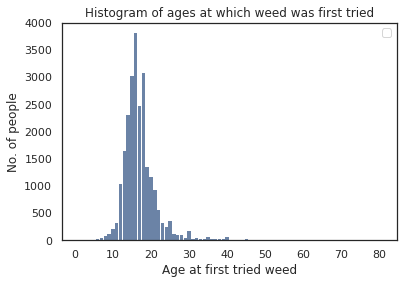

In [72]:
data_weed_only=drug.MJAGE[(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100)]
hist= thinkstats2.Hist(data_weed_only)
thinkplot.hist(hist)
thinkplot.Config(xlabel='Age at first tried weed', ylabel='No. of people', title='Histogram of ages at which weed was first tried')

Exploring the idea of which drugs show most correlation with weed use. This is one of the main questions I wanted to explore. We will be looking the overlap in users between Weed and Cocaine, Alcohol, Heroine and LSD

Coke and weed use

In [17]:
data_coke_weed=drug.COCEVER[(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100) & (drug['COCEVER'] == 1)]
data_coke_only=drug.COCEVER[(drug['COCEVER'] == 1)]

print("% of coke users who have consumed weed= ",(len(data_coke_weed)/len(data_coke_only))*100)#97.5% of coke users have consumed marijunana in the past

data_weed_coke=drug.MJAGE[(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100) & (drug['COCEVER'] == 1)]
print("% of weed users who have consumed coke  = ",(len(data_weed_coke)/len(data_weed_only))*100)#Only 27% of weed users have done coke. 

print("No of people who have done weed = ",len(data_weed_only))
print("No of people who have done coke = ",len(data_coke_only))
#did both


% of coke users who have consumed weed=  97.53891771682729
% of weed users who have consumed coke  =  27.38739488801932
No of people who have done weed =  24022
No of people who have done coke =  6745


Coke and heroine

In [26]:
data_her_weed=drug.HEREVER[(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100) & (drug['HEREVER'] == 1)]
data_her_only=drug.HEREVER[(drug['HEREVER'] == 1)]

print("% of heroine users who have consumed weed= ",(len(data_her_weed)/len(data_her_only))*100)#96.7% of Heroine users have consumed marijunana

data_weed_her=drug.MJAGE[(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100) & (drug['HEREVER'] == 1)]
print("% of weed users who have consumed heroine  = ",(len(data_her_weed)/len(data_weed_only))*100)#4.15% of weed users have consumed heroine

print("No of people who have done weed = ",len(data_weed_only))
print("No of people who have done heroine = ",len(data_her_only))

% of heroine users who have consumed weed=  96.98736637512148
% of weed users who have consumed heroine  =  4.154525018732828
No of people who have done weed =  24022
No of people who have done heroine =  1029


Weed and LSD

In [40]:
data_lsd_weed=drug.LSD[(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100) & (drug['LSD'] == 1)]
data_lsd_only=drug.LSD[(drug['LSD'] == 1)]

print("% of LSD users who have consumed weed= ",(len(data_lsd_weed)/len(data_lsd_only))*100)#98.1% of LSD users have consumed marijunana 

data_weed_lsd=drug.MJAGE[(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100) & (drug['LSD'] == 1)]
print("% of weed users who have consumed LSD  = ",(len(data_lsd_weed)/len(data_weed_only))*100)#4.15% of weed users have consumed LSD 

print("No of people who have done weed = ",len(data_weed_only))
print("No of people who have done LSD = ",len(data_lsd_only))

% of LSD users who have consumed weed=  98.16200042744177
% of weed users who have consumed LSD  =  19.11997335775539
No of people who have done weed =  24022
No of people who have done LSD =  4679


ALcohol and weed

In [41]:
data_alc_weed=drug.ALCEVER[(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100) & (drug['ALCEVER'] == 1)]
data_alc_only=drug.ALCEVER[(drug['ALCEVER'] == 1)]

print("% of alcohol users who have consumed weed= ",(len(data_alc_weed)/len(data_alc_only))*100)#57.3% of alcohol users have consumed weed 

data_weed_alc=drug.MJAGE[(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100) & (drug['ALCEVER'] == 1)]
print("% of weed users who have consumed Alcohol  = ",(len(data_alc_weed)/len(data_weed_only))*100)#96.1% of weed users have consumed alcohol 
#Only 27% of weed users have done coke. 
print("No of people who have done weed = ",len(data_weed_only))
print("No of people who have done Alcohol = ",len(data_alc_only))

% of alcohol users who have consumed weed=  57.34191575416791
% of weed users who have consumed Alcohol  =  96.79044209474648
No of people who have done weed =  24022
No of people who have done Alcohol =  40548


Now we shall explore the second question. Is weed a gateway drug? I feel there is no single way to test this hypothesis, so instead we shall explore various trends related to the age at which various drugs were used with conjunction to weed

Histograms to indicate ages at which different drugs were tried

No handles with labels found to put in legend.


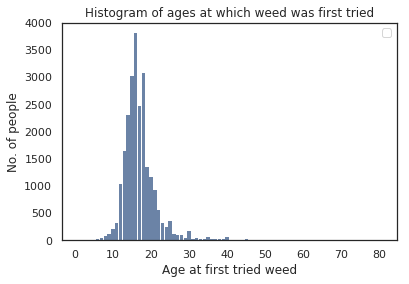

In [55]:
hist_weed=thinkstats2.Hist(data_weed_only_age)
thinkplot.hist(hist_weed)
thinkplot.Config(xlabel='Age at first tried weed', ylabel='No. of people', title='Histogram of ages at which weed was first tried')

No handles with labels found to put in legend.


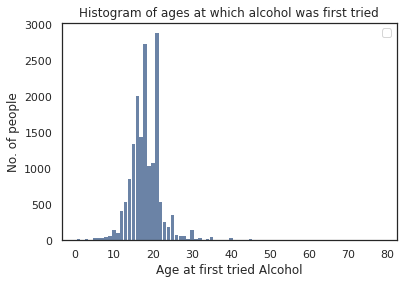

In [56]:
hist_alc=thinkstats2.Hist(data_alc_only_age)
thinkplot.hist(hist_alc)
thinkplot.Config(xlabel='Age at first tried Alcohol', ylabel='No. of people', title='Histogram of ages at which alcohol was first tried')

No handles with labels found to put in legend.


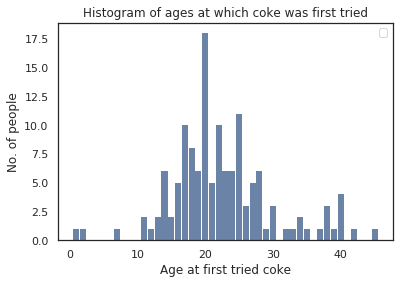

In [57]:
hist_coke=thinkstats2.Hist(data_coc_only_age)
thinkplot.hist(hist_coke)
thinkplot.Config(xlabel='Age at first tried coke', ylabel='No. of people', title='Histogram of ages at which coke was first tried')

In [60]:
data_alc_weed_age=drug.ALCTRY[(drug['MJEVER'] == 1) & (drug['ALCEVER'] == 1)&(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100)&(drug['ALCTRY'] >= 0) & (drug['ALCTRY'] <= 100)]
data_weed_alc_age=drug.MJAGE[(drug['ALCEVER'] == 1)& (drug['MJEVER'] == 1)&(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100)&(drug['ALCTRY'] >= 0) & (drug['ALCTRY'] <= 100)]
data_alc_only_age=drug.ALCTRY[(drug['ALCEVER'] == 1)&(drug['ALCTRY'] >= 0) & (drug['ALCTRY'] <= 100)&(drug['MJEVER'] == 2)]
data_weed_only_age=drug.MJAGE[(drug['MJEVER'] == 1)&(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100)]
print("Age weed users have first tried alcohol" , data_alc_weed_age.mean())

print("Age Alcohol users have first tried weed" , data_weed_alc_age.mean())
print("Age Alcohol users(who have not done weed) have first tried alcohol", data_alc_only_age.mean())
print("Age Weed users(who have not done alcohol) have first tried weed" ,data_weed_only_age.mean())

print("Cohen effect size between the age difference of people who have done only alcohol and people who have done both alcohol and weed=",CohenEffectSize(data_weed_alc_age,data_alc_only_age))#Cohen effect size between people who have done only alc and those who 
#did both

Age weed users have first tried alcohol 15.662202445241284
Age Alcohol users have first tried weed 17.196180930574158
Age Alcohol users(who have not done weed) have first tried alcohol 18.27062133365258
Age Weed users(who have not done alcohol) have first tried weed 17.149571226375823
Cohen effect size between the age difference of people who have done only alcohol and people who have done both alcohol and weed= -0.23296699252090242


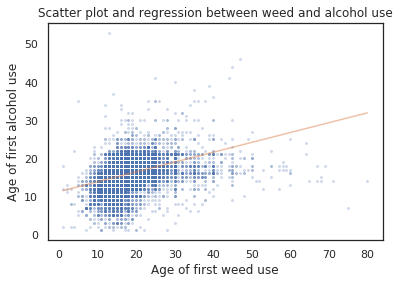

In [64]:
import matplotlib.pyplot as plt


plt.plot(data_weed_alc_age, data_alc_weed_age, 'o', markersize='2', alpha=0.2)
plt.title('Scatter plot and regression between weed and alcohol use')
plt.xlabel('Age of first weed use')
plt.ylabel('Age of first alcohol use');

xs = data_weed_alc_age.dropna()
ys = data_alc_weed_age.dropna()

res = linregress(xs, ys)
res
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.5)


In [65]:
data_coc_weed_age=drug.COCAGE[(drug['MJEVER'] == 1) & (drug['COCEVER'] == 1)&(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100)&(drug['COCAGE'] >= 0) & (drug['COCAGE'] <= 60)]
data_weed_coc_age=drug.MJAGE[(drug['COCEVER'] == 1)& (drug['MJEVER'] == 1)&(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100)&(drug['COCAGE'] >= 0) & (drug['COCAGE'] <= 60)]
data_coc_only_age=drug.COCAGE[(drug['COCEVER'] == 1)&(drug['COCAGE'] >= 0) & (drug['COCAGE'] <= 100)&(drug['MJEVER'] == 2)]
data_weed_only_age=drug.MJAGE[(drug['MJEVER'] == 1)&(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100)]
print("Age weed users have first tried coke" , data_coc_weed_age.mean())

print("Age coke users have first tried weed" , data_weed_coc_age.mean())
print("Age coke users(who have not done weed) have first tried coke", data_coc_only_age.mean())
print("Age Weed users(who have not done coke) have first tried weed" ,data_weed_only_age.mean())
print("Cohen effect size between the age difference of people who have done only cocaine and people who have done both cocaine and weed=",CohenEffectSize(data_weed_coc_age,data_coc_only_age))#Cohen effect size between people who have done only coc and those who 
#did both

Age weed users have first tried coke 20.680366692131397
Age coke users have first tried weed 15.70252100840336
Age coke users(who have not done weed) have first tried coke 22.511111111111113
Age Weed users(who have not done coke) have first tried weed 17.149571226375823
Cohen effect size between the age difference of people who have done only cocaine and people who have done both cocaine and weed= -1.8606811418224223


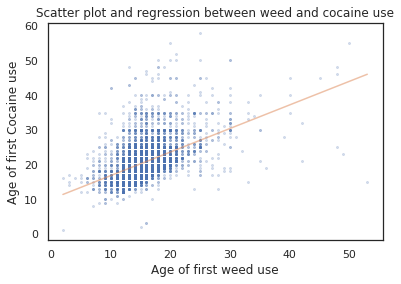

In [67]:
import matplotlib.pyplot as plt


plt.plot(data_weed_coc_age, data_coc_weed_age, 'o', markersize='2', alpha=0.2)

plt.xlabel('Age of first weed use')
plt.ylabel('Age of first Cocaine use');

from scipy.stats import linregress

plt.title('Scatter plot and regression between weed and cocaine use')

xs = data_weed_coc_age.dropna()
ys = data_coc_weed_age.dropna()

res = linregress(xs, ys)
res
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.5)

In [66]:
data_her_weed_age=drug.HERAGE[(drug['MJEVER'] == 1) & (drug['HEREVER'] == 1)&(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100)&(drug['HERAGE'] >= 0) & (drug['HERAGE'] <= 60)]
data_weed_her_age=drug.MJAGE[(drug['HEREVER'] == 1)& (drug['MJEVER'] == 1)&(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100)&(drug['HERAGE'] >= 0) & (drug['HERAGE'] <= 60)]
data_her_only_age=drug.HERAGE[(drug['HEREVER'] == 1)&(drug['HERAGE'] >= 0) & (drug['HERAGE'] <= 100)&(drug['MJEVER'] == 2)]
data_weed_only_age=drug.MJAGE[(drug['MJEVER'] == 1)&(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100)]
print("Age weed users have first tried heroine" , data_her_weed_age.mean())

print("Age heroine users have first tried weed" , data_weed_her_age.mean())
print("Age heroine users(who have not done weed) have first tried heroine", data_her_only_age.mean())
print("Age Weed users(who have not done heroine) have first tried weed" ,data_weed_only_age.mean())
print("Cohen effect size between the age difference of people who have done only heroine and people who have done both heroine and weed=",CohenEffectSize(data_weed_her_age,data_her_only_age))#Cohen effect size between people who have done only heroine and those who 
#did both

Age weed users have first tried heroine 22.69838056680162
Age heroine users have first tried weed 14.246963562753036
Age heroine users(who have not done weed) have first tried heroine 24.14814814814815
Age Weed users(who have not done heroine) have first tried weed 17.149571226375823
Cohen effect size between the age difference of people who have done only heroine and people who have done both heroine and weed= -2.638993179873541


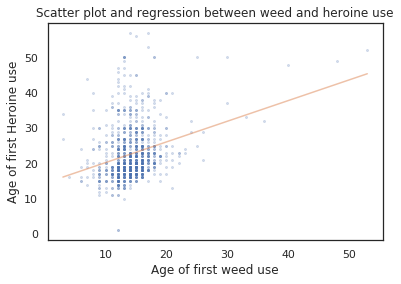

In [68]:
import matplotlib.pyplot as plt


plt.plot(data_weed_her_age, data_her_weed_age, 'o', markersize='2', alpha=0.2)
plt.title('Scatter plot and regression between weed and heroine use')

plt.xlabel('Age of first weed use')
plt.ylabel('Age of first Heroine use');

xs = data_weed_her_age.dropna()
ys = data_her_weed_age.dropna()

res = linregress(xs, ys)
res
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.5)

In [70]:
data_alc_age=drug.ALCTRY[(drug['ALCEVER'] == 1)&(drug['ALCTRY'] >= 0) & (drug['ALCTRY'] <= 100)]
data_weed_age=drug.MJAGE[(drug['MJEVER'] == 1)&(drug['MJAGE'] >= 0) & (drug['MJAGE'] <=100)]
data_her_age=drug.HERAGE[(drug['HEREVER'] == 1)&(drug['HERAGE'] >= 0) & (drug['HERAGE'] <= 100)]
data_coc_age=drug.COCAGE[(drug['COCEVER'] == 1)&(drug['COCAGE'] >= 0) & (drug['COCAGE'] <= 100)]

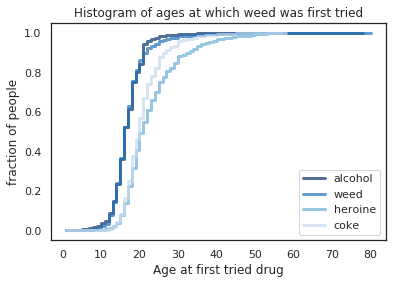

In [75]:
thinkplot.PrePlot(4)
cdf_alc = Cdf(data_alc_age)
cdf_weed = Cdf(data_weed_age)
cdf_her = Cdf(data_her_age)
cdf_coke = Cdf(data_coc_age)

thinkplot.cdf(cdf_alc, label='alcohol')
thinkplot.cdf(cdf_weed, label='weed')
thinkplot.cdf(cdf_her, label='heroine')
thinkplot.cdf(cdf_coke, label='coke')
#CDFs indicaging ages at which various drugs are tried.
thinkplot.Config(xlabel='Age at first tried drug', ylabel='fraction of people', title='Histogram of ages at which weed was first tried')